In [3]:
cd Documents/GitHub/La_Jara/Presentations/DOEPI_Poster/Storm1

C:\Users\nicol\Documents\GitHub\La_Jara\Presentations\DOEPI_Poster\Storm1


In [6]:
#Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

up = pd.read_excel('st1_up.xlsx')
down = pd.read_excel('st1_down.xlsx')

import matplotlib.collections as mcoll
import matplotlib.path as mpath

######################## creating the function for my colorline #######################
def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc


C:\Users\nicol\AppData\Local\Temp\ipykernel_35116\4004253304.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc, ax=ax1)


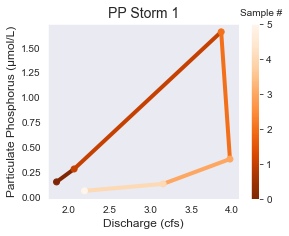

In [75]:
fig, (ax1) = plt.subplots(figsize=(4,3))
sns.set_style('darkgrid')
cm = plt.cm.get_cmap('Oranges_r')
fig.tight_layout(h_pad=100)


z = np.linspace(0, 1, len(up['q']))
colorline(up['q'], up['SRP'], z, cmap=plt.get_cmap('Oranges_r'), linewidth=4)
sc =ax1.scatter(up['q'], up['P'], c=range(len(up['q'])), cmap=cm, zorder=100)
plt.grid(False)
plt.colorbar(sc, ax=ax1)
plt.text(4.1,1.82,'Sample #', fontsize=10)
ax1.set_title('PP Storm 1', fontsize=14)
ax1.set_ylabel("Particulate Phosphorus (\u03bcmol/L)", fontsize=12)
ax1.set_xlabel("Discharge (cfs)", fontsize=12)

plt.savefig("ST1_PP_UP.png", bbox_inches = 'tight', dpi=1000)